# Step 1 – Import libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 2 – Connect to SQLite database

In [2]:
database_connection = sqlite3.connect("sales_data.db")

# Step 3 – Creating a sales table and inserting more sample data

In [3]:
# Creating a cursor to run SQL commands
sql_runner = database_connection.cursor()

In [4]:
# Drop table if exists
sql_runner.execute("DROP TABLE IF EXISTS sales")

In [5]:
# Creating table
sql_runner.execute("""
CREATE TABLE sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [6]:
# Inserting more sample rows 
sample_sales_data = [
    ("Apples", 50, 2.5),
    ("Bananas", 75, 1.2),
    ("Cherries", 20, 5.0),
    ("Dates", 40, 3.0),
    ("Oranges", 65, 2.0),
    ("Apples", 30, 2.5),
    ("Bananas", 40, 1.2),
    ("Cherries", 25, 5.0),
    ("Dates", 15, 3.0),
    ("Oranges", 35, 2.0)
]

In [7]:
sql_runner.executemany("INSERT INTO sales VALUES (?, ?, ?)", sample_sales_data)
database_connection.commit()

# Step 4 – Running SQL query to get total quantity & revenue

In [10]:
query = """
SELECT product,
       SUM(quantity) AS total_quantity,
       SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""
import pandas as pd
sales_summary = pd.read_sql_query(query, database_connection)

# Step 5 – Printing the summary

In [12]:
print("Total Revenue & Quantity per Product")
print(sales_summary)

Total Revenue & Quantity per Product
    product  total_quantity  total_revenue
0    Apples              80          200.0
1   Bananas             115          138.0
2  Cherries              45          225.0
3     Dates              55          165.0
4   Oranges             100          200.0


In [13]:
# 2. Top-selling product by quantity
query2 = """
SELECT product,
       SUM(quantity) AS total_quantity
FROM sales
GROUP BY product
ORDER BY total_quantity DESC
LIMIT 1
"""
top_selling = pd.read_sql_query(query2, database_connection)
print("\n Top-Selling Product by Quantity")
print(top_selling)


 Top-Selling Product by Quantity
   product  total_quantity
0  Bananas             115


In [15]:
# 3. Top revenue-generating product
query3 = """
SELECT product,
       SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
ORDER BY total_revenue DESC
LIMIT 1
"""
top_revenue = pd.read_sql_query(query3, database_connection)
print("\n Top Revenue-Generating Product")
print(top_revenue)


 Top Revenue-Generating Product
    product  total_revenue
0  Cherries          225.0


In [16]:
# 4. Total revenue overall
query4 = """
SELECT SUM(quantity * price) AS overall_revenue
FROM sales
"""
total_revenue = pd.read_sql_query(query4, database_connection)
print("\n Total Revenue Overall")
print(total_revenue)


 Total Revenue Overall
   overall_revenue
0            928.0


In [17]:
# 5. Average price per product
query5 = """
SELECT product,
       ROUND(AVG(price), 2) AS avg_price
FROM sales
GROUP BY product
"""
avg_price = pd.read_sql_query(query5, database_connection)
print("\n Average Price per Product")
print(avg_price)


 Average Price per Product
    product  avg_price
0    Apples        2.5
1   Bananas        1.2
2  Cherries        5.0
3     Dates        3.0
4   Oranges        2.0


# Import Matplotlib

In [18]:
import matplotlib.pyplot as plt

# Plot Top 5 Products by Revenue

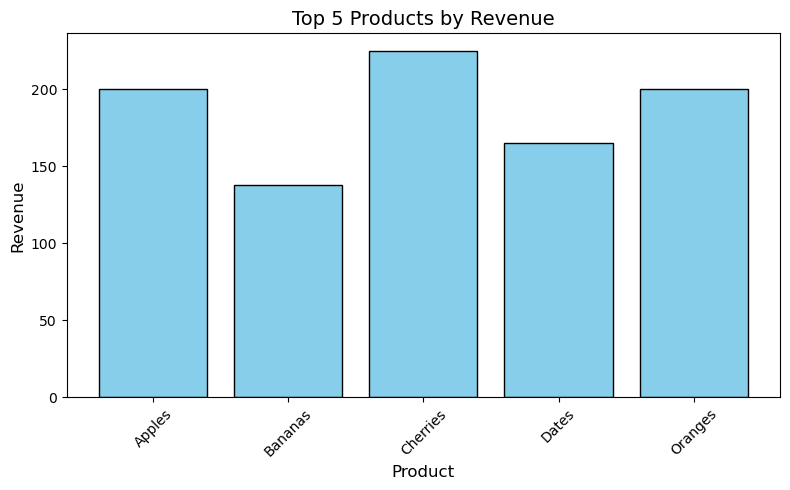

In [27]:
# Take first query's output (sales_summary) and plot
top5 = sales_summary.head(5)

plt.figure(figsize=(8,5))
plt.bar(top5['product'], top5['total_revenue'], color='skyblue', edgecolor='black')
plt.title("Top 5 Products by Revenue", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("Top 5 Products by Revenue",dpi=300)

plt.show()

# Plot Quantity vs Revenue (Scatter Plot)

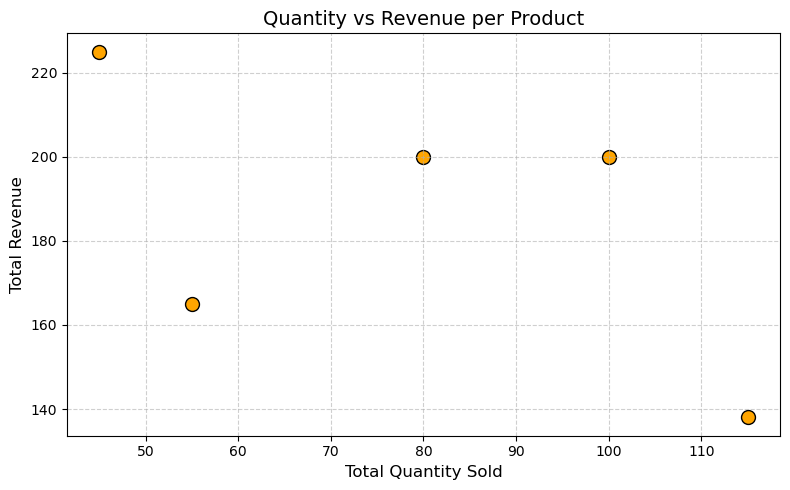

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(sales_summary['total_quantity'], sales_summary['total_revenue'], 
            color='orange', edgecolor='black', s=100)
plt.title("Quantity vs Revenue per Product", fontsize=14)
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig("Quantity vs Revenue per Product",dpi=300)

plt.show()

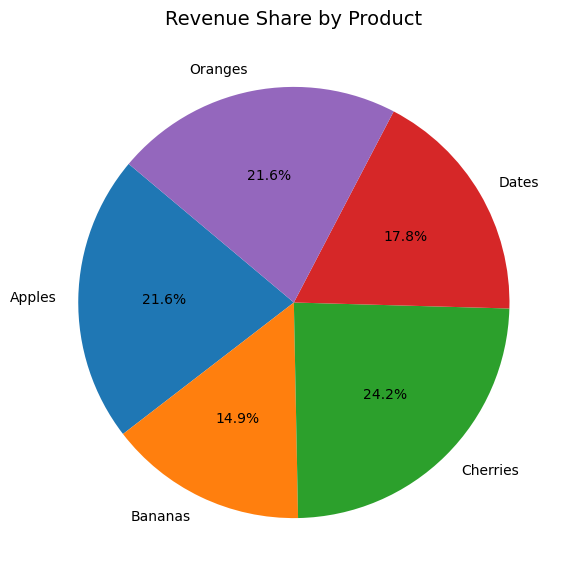

In [29]:
plt.figure(figsize=(7,7))
plt.pie(sales_summary['total_revenue'], 
        labels=sales_summary['product'], 
        autopct='%1.1f%%', startangle=140)
plt.title("Revenue Share by Product", fontsize=14)

plt.savefig("Revenue Share by Product",dpi=300)

plt.show()

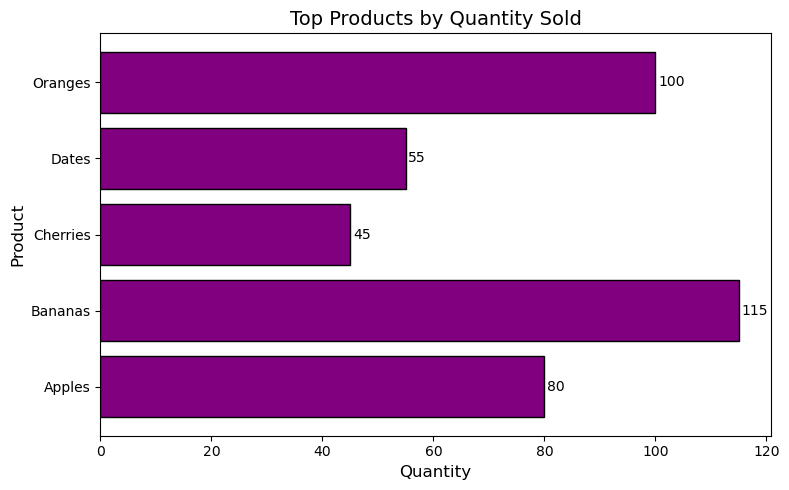

In [30]:
plt.figure(figsize=(8,5))
plt.barh(sales_summary['product'], sales_summary['total_quantity'], 
         color='purple', edgecolor='black')
for index, value in enumerate(sales_summary['total_quantity']):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10, color='black')
plt.title("Top Products by Quantity Sold", fontsize=14)
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.tight_layout()

plt.savefig("Top Products by Quantity Sold",dpi=300)

plt.show()

In [31]:
database_connection.close()